In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import json
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import StratifiedKFold

In [2]:
from google.cloud import vision
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="APAD-DARASIMI-8c1a66d445ac.json"
client = vision.ImageAnnotatorClient()
image = vision.types.Image()

In [3]:
data = pd.read_csv("output.csv")
data.head()

,type,media_url,caption,likes,comments
0,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"Photo by @jasperdoest | Penguins, like other b...",123736,697
1,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,Photo by William Albert Allard @williamalberta...,176725,343
2,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,Photo by Katie Orlinsky @katieorlinsky | A you...,205613,859
3,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,Photo by Trevor Frost @tbfrost | Snakes in car...,188741,920
4,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,Photo by Michael Melford @michaelmelford | An ...,293077,589


## Normalize Likes & Comments

In [5]:
Likes = data['likes']
Norm_Likes = (Likes-Likes.min())/(Likes.max()-Likes.min())
print(Norm_Likes.head())
print("The range of Norm_Likes is between %i and %i"%(Norm_Likes.max(),Norm_Likes.min()))
print()
Comments = data['comments']
Norm_Comments = (Comments-Comments.min())/(Comments.max()-Comments.min())
print(Norm_Comments.head())
print("The range of Norm_Comments is between %i and %i"%(Norm_Comments.max(),Norm_Comments.min()))

0    0.000338
1    0.035831
2    0.055181
3    0.043879
4    0.113766
Name: likes, dtype: float64
The range of Norm_Likes is between 1 and 0

0    0.036970
1    0.009301
2    0.049633
3    0.054401
4    0.028529
Name: comments, dtype: float64
The range of Norm_Comments is between 1 and 0


## Engagement Score

In [6]:
Engagement_Score = 0.4*Norm_Likes + 0.6*Norm_Comments
print(Engagement_Score.head())
Engagement_Median = Engagement_Score.median()
print("The Engagement_Median is %f"% Engagement_Median)

0    0.022317
1    0.019913
2    0.051852
3    0.050192
4    0.062624
dtype: float64
The Engagement_Median is 0.062108


## Determine Engagement [ 1 or 0 ] base on Engagement Score

In [7]:
Engagement = Engagement_Score.apply(lambda x: 1 if x >= Engagement_Median else 0)
print(Engagement.head())

0    0
1    0
2    0
3    0
4    1
dtype: int64


In [8]:
data['Norm_Likes'] = Norm_Likes
data['Norm_Comments'] = Norm_Comments
data['Engagement_Score'] = Engagement_Score
data['Engagement'] = Engagement

In [9]:
data.to_csv('TaskA.csv', index=False)

## GET IMAGE LABELS

In [10]:
def detect_labels_uri(uri):
    """Detects labels in the file located in Google Cloud Storage or on the
    Web."""
    image.source.image_uri = uri
    response = client.label_detection(image=image)
    labels = response.label_annotations
    label_description = []
    for label in labels:
        label_description.append(label.description)
    return label_description

In [11]:
df = pd.read_csv('TaskA.csv')

In [13]:
df["image_labels"] = df["media_url"].apply(lambda x: detect_labels_uri(x))

In [14]:
df = df[['type','media_url','image_labels','caption','likes','comments','Norm_Likes','Norm_Comments','Engagement_Score','Engagement']]

In [15]:
df

,type,media_url,image_labels,caption,likes,comments,Norm_Likes,Norm_Comments,Engagement_Score,Engagement
0,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[Flightless bird, Gentoo penguin, Feather, Pen...","Photo by @jasperdoest | Penguins, like other b...",123736,697,0.000338,0.036970,0.022317,0
1,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[Action-adventure game, Horse, Cowboy, Screens...",Photo by William Albert Allard @williamalberta...,176725,343,0.035831,0.009301,0.019913,0
2,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[Winter, Snow, Arctic, Ice, Headgear, Playing ...",Photo by Katie Orlinsky @katieorlinsky | A you...,205613,859,0.055181,0.049633,0.051852,0
3,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[People, Fun, Event, Crowd, Art, Night, Perfor...",Photo by Trevor Frost @tbfrost | Snakes in car...,188741,920,0.043879,0.054401,0.050192,0
4,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[Water, Liquid, Close-up, Sky, Sand, Pattern, ...",Photo by Michael Melford @michaelmelford | An ...,293077,589,0.113766,0.028529,0.062624,1
5,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[Food, Baking, Cuisine, Dish, Bakery, Sourdoug...",Photo by @gerdludwig | Wearing the local costu...,292550,1636,0.113413,0.110364,0.111584,1
6,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[Water, Tree, Coast, Sea, Adaptation, Linens, ...",Photo by Saumya Khandelwal @khandelwal_saumya ...,136274,294,0.008736,0.005471,0.006777,0
7,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[Sky, Wildlife, Organism, Cloud, Photography, ...",Photo by Keith Ladzinski @ladzinski | In searc...,751550,2898,0.420861,0.209004,0.293747,1
8,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[Water, Sky, Sea, Stock photography, Happy, Fu...",Photo by Maggie Steber @maggiesteber | I have ...,301389,715,0.119333,0.038377,0.070760,1
9,GraphImage,https://scontent-ort2-1.cdninstagram.com/v/t51...,"[Flightless bird, Gentoo penguin, Feather, Pen...","Photo by @jasperdoest | Penguins, like other b...",123784,697,0.000370,0.036970,0.022330,0


In [16]:
df.to_csv('image_labels.csv', index=False)

## USE IMAGE_LABELS.CSV to get the latest csv. That should be used on the remainder sections

## LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
lr = LogisticRegression(C=10.0, random_state=0)

x = df.iloc[:,:8]
y = df.iloc[:, -1:]
y.head()

,Engagement
0,1
1,1
2,1
3,0
4,0


In [32]:
type_image = x.iloc[:, 0].values
    
type_map = {label:idx for idx,label in 
                 enumerate(np.unique(type_image))
                }

media_url = x.iloc[:, 1].values
    
media_map = {label:idx for idx,label in 
                 enumerate(np.unique(type_image))
                }

caption = x.iloc[:, 2].values
    
caption_map = {label:idx for idx,label in 
                 enumerate(np.unique(caption))
                }

x['type'] = x['type'].map(type_map)
x['media_url'] = x['media_url'].map(media_map)
x['caption'] = x['caption'].map(caption_map)

In [35]:
x.drop(['media_url'],axis=1,inplace=True)

In [36]:
x.head()

,type,caption,likes,comments,Norm_Likes,Norm_Comments,Engagement_Score
0,0,5,256591,1271,0.243893,0.350037,0.307579
1,0,8,587042,1692,0.996790,0.504023,0.701130
2,0,0,312169,3039,0.370521,0.996708,0.746233
3,0,13,153079,394,0.008052,0.029261,0.020777
4,0,10,163279,618,0.031291,0.111192,0.079232


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 0)

In [38]:
lr.fit(x_train,y_train)

/Users/stevenoluwaniyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/stevenoluwaniyi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = lr.predict(x_test)

In [43]:
print(confusion_matrix(y_test, y_pred))

[[52 57]
 [18 89]]


In [47]:
print("The accuracy score is ", accuracy_score(y_test, y_pred) * 100,"%" )

The accuracy score is  65.27777777777779 %


In [81]:
detect_labels_uri("https://instagram.fftw1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/74339309_354740358671306_6816845177039124307_n.jpg?_nc_ht=instagram.fftw1-1.fna.fbcdn.net&_nc_cat=1&oh=a68987b7baa84b1da348b55a7a15706c&oe=5E52C2FD")

['Bengal tiger',
 'Mammal',
 'Felidae',
 'Wildlife',
 'Tiger',
 'Terrestrial animal',
 'Big cats',
 'Snout',
 'Carnivore',
 'Siberian tiger']

In [3]:
df = pd.read_csv('image_labels.csv')

In [56]:
same_map = {
    'Terrestrial animal':  ['Bengal tiger', 'Siberian Tiger','Big cats','Giraffidae',
                               'Giraffe', 'Giraffidae','Felidae','Panda','Bear','Fur','Lycaon pictus','Canidae','Snout'
                               'Antler','Barren ground Caribou','Deer','Black rhinoceros','Black-footed ferret','Bull','Burmese python',
                                'Python','Burro','Dog','Dog breed','Elk','Fawn','Ferret','Frog','Hognose snake','Indian elephant','Indian rhinoceros',
                                'Mare','Mustelidae','Mustelinae','Python','Python family','Reindeer',
                               'Rhinoceros','Sloth','Stoat','Suidae','Three-toed sloth',
                               'Warthog','Weasel','White rhinoceros','polecat','African elephant','Arabian camel','Bovine','Camel',
                                'Camelid','Elapidae','Elephants and Mammoths','Elephants','Hunting dog','Hyena','Irish wolfhound',
                                'Mane','Scaled reptile','Serpent','Snake','Masai lion','Lion'
                               ],
    'Music': ['Accordion','Accordionist','Diatonic button accordion','Concertina','Folk instrument','Free reed aerophone',
             'Trikiti','Garmon'],
    'Sky' : ['Cumulus','Cloud'],
    'Volant animal' : ['Budgie','Lovebird','Macaw','Parrot','Pelican','Ciconiiformes','Stork','Wing','Seabird',
                      'Flightless bird','Bird'],
    'Wildlife': ['Dinosaur','Grazing','Phyllobates','Poison dart frog','Tyrannosaurus','Velociraptor','Pack animal','Jungle'],
    'Aquatic animal' :  ['Cartilaginous fish','Fish','Manta ray','Marine biology','Rays and skates','Skate','Amphibian',
                        'Bull shark','Carcharhiniformes','Deep sea fish','Great white shark','Green sea turtle',
                        'Hairfinned silverfish','Humpback whale','Hawksbill sea turtle',"Kemp's ridley sea turtle",
                        'Loggerhead sea turtle','Manta ray','Olive ridley sea turtle','Requiem shark','Sea turtle',
                        'Shark','Stingray','Tiger shark','Toad','Whale','grey whale','Cetacea','Earless seal','Fin','Fur seal',
                        'Harbor seal','Seal','Water bird','Emperor penguin''Gentoo penguin','Penguin','Marine mammal' ],
    'Animal' :['Carnivore','Mammal','Organism','Flesh','Cheek','Climbing','Eating','Herder','Hip','Hug','Knee','Mouth',
              'Skeleton','Tail','Turtle','Claw','Chin','Male','Reptile','Beak','Skin','Vertebrate'],
    'Nature': ['Night','Underwater','Cloud','Darkness','Space','Mud','Safari','Natural environment',
              'Field','Savanna','Groundcover','Atmosphere','Atmospheric phenomenon',
              'Wind','Star','Afterglow','Bedrock','Bird migration','Birth','Cave','Cliff','Coastal and oceanic landforms',
              'Dirt road','Extinction','Family','Fire','Flame','Flock','Floor','Fog','Fossil','Harvest','Harvester',
              'Heat','Ice cave','Interaction','Lava tube','Magenta','Massif',
              'Metal','Mist','Outcrop','Pasture','Steppe','Stratovolcano','Summit','Sunrise','Tide','Tundra',
              'Volcanic landform','Volcano','Wadi','Dune','Erg','Iceberg','Rainforest','Aeolian landform','Desert',
              'Highland','Sahara','Ecoregion','Snow','Wilderness','Organism','Rock','Mountain'],
    
    'Plant' :['Crop','Woody plant','Tree','Grass','Grassland','Plantation','Green','Branch','Lawn','Attalea speciosa','Desert Palm',
             'Borassus flabellifer','Borassus flabellifer','Elaeis','Flower','Fungus','Groundcover','Terrestrial plant','Arecales'
             'Cash crop','Date palm','Soil','Vegetation','Leaf'
             ],
    'Architecture':     ['Building','Door','Room','Stairs','Wall','Landmark','Tower','Spire','Finial','Bridge','Cityscape',
                        'Holy places','Hospital','Museum','Statue','Village','Vineyard'],
    'Aquatic': ['Arctic','Arctic ocean','Blue','Glacial landform','Glacier','Ice','Ice cave','Iceberg','Polar ice cap',
               'Boat','Sail','Sailing ship','Sailing','Sea','Tall ship','Watercraft','Water','Aqua','Diving equipment','Dike',
               'Coral','Coral reef','Harbor','Reef','Sea ice','Tarn','Pond','Arctic ocean','River','Ocean','Water'],
    'Human element': ['Vacation','Street fashion','Human body','Human','Artificial turf','Shoe','Bed sheet',
                     'Basketball','Bedroom','Blazer','Bow tie','Bride','Bridle','Caving',
                      'Cheerleading','Clinic','Cooling tower','Dance','Electrical supply','Electricity','Explosion',
                     'Fashion accessory','Fiction','Fictional character','Flare','Flash photography','Flip (acrobatic)',
                     'Flooring','Footwear','Gardener','Gentleman','Gown','Grandparent','Halter','Head restraint',
                     'Headpiece','Horse harness','Horse supplies','Horse tack','Human leg','Human settlement',
                     'Knitting','Living room','Love','Metropolis','Metropolitan area','Military person','Music venue',
                     'National park','Net','Personal protective equipment','Scuba diving','Garden',
                     'Military camouflage','Military organization','Military uniform'],
    'Food' : ['Comfort food','Meal','Restaurant','Agriculture','Bread','Bun'],
    'Furniture' : ['Bed','Chair','Coffee table','Compact car','Fan','Hospital bed'],
    'Photography' : ['Lens flare','Screenshot','Reflection','Scene','Digital compositing','Collage','Colorfulness',
                    'Photo shoot','Portrait photography','Visual effect lighting','Wallpaper','Visual arts'],
    'Transportation' :['Bicycle drivetrain part','Bicycle wheel','Car','Carriage','Vehicle','Family car','Horse and buggy',
                      'Mid-size car','Wagon','Watercraft','Bicycle',],
    'Technology': ['Display device','Electronic device','Squeezebox'],
    'Weapons' :['Airsoft','Gun','Shotgun','Gunfighter']
}

In [57]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [58]:
def get_split_char(caption):
    if '@simonnorfolkstudio' in caption:
        return 'I'
    elif '@dguttenfelder' in caption:
        return '//'
    else:
        return '|'

def cut_n_trailing_words(words):
    count = 0
    for word in reversed(words):
        if word == '' or word[0] == '#' or word[0] == '@' or word.endswith('2063#tehran'):
            count += 1
        else:
            break
    return count
    
def clean(caption):
    try:
        v1 = ' '.join(caption.split(get_split_char(caption))[1:]).strip()
    except Exception as e:
        print(caption)
        print(e)
    v2 = v1[:-3] if v1.endswith('}}]') else v1
    v3 = v2.replace('\\n', ' ').replace('\\', '\'').replace('//', '')
    v3_split = [lemmatizer.lemmatize(ps.stem(x)) for x in v3.split(' ') if (x != '' and x not in stop_words)]
    v3_cutoff = -1 * cut_n_trailing_words(v3_split)
    v4 = ' '.join(v3_split[:v3_cutoff]) if v3_cutoff != 0 else ' '.join(v3_split)
    return v4

cleaned_captions = [clean(c) for c in df['caption']]

In [59]:
joined_cleaned_captions = ' '.join(cleaned_captions)

In [60]:
def splitter(data):
    words = re.sub("([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", data.lower()).split()
    return [word for word in words]

In [61]:
caption_words = splitter(joined_cleaned_captions)

In [62]:
same_inv_map = {word: root for root, words in same_map.items() for word in words}

In [63]:
def convert_same_all(words):
    return [convert_same(word) for word in words]

def convert_same(word):
    return same_inv_map[word] if word in same_inv_map else word

caption_words_converted = convert_same_all(caption_words)
selected_words = np.intersect1d(np.array([]).tolist(), caption_words_converted)
Counter(caption_words_converted).most_common(20)

[('i', 178),
 ('woman', 144),
 ('the', 129),
 ('photograph', 108),
 ('follow', 107),
 ('for', 96),
 ('world', 95),
 ('women', 91),
 ('stori', 84),
 ('one', 74),
 ('life', 74),
 ('use', 71),
 ('it', 66),
 ('like', 64),
 ('next', 63),
 ('a', 62),
 ('week', 54),
 ('see', 52),
 ('imag', 51),
 ('nat', 51)]

In [64]:
df['image_labels_mapped'] = df['image_labels'].apply(lambda l: json.loads(l.replace('\'', '\"'))).apply(convert_same_all)
# use in place of above if an error occurs
# df['image_labels_mapped'] = df['image_labels'].map(convert_same_all)

In [157]:
def tf_idf(list_of_lists):
    words = [word for l in list_of_lists for word in l]
    words = [t[0] for t in Counter(words).most_common(100)]
    tf = pd.DataFrame(False, index=range(len(list_of_lists)), columns=words)
    
    for col in words:
        tf[col] = [l.count(col)/len(l) for l in list_of_lists]
    
    number_of_docs = len(list_of_lists)
    
    idf = (tf
        .applymap(lambda v: v != 0)
        .sum(axis='rows')
        .apply(lambda v: np.log(number_of_docs/v)))
    
    return pd.DataFrame([np.multiply(row.tolist(), idf.tolist()) for _, row in tf.iterrows()])
    

tf_idf_df = tf_idf(df['image_labels_mapped'])
X = tf_idf_df.values
y = df['Engagement'].values

Accuracy score (image labels only): 0.6944444444444444


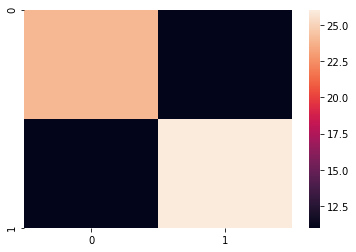

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy score (image labels only):', accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred));

In [155]:
#adding over selected words for each image
X = df['image_labels_mapped'].map(lambda v: v + selected_words.tolist())

Accuracy score (image labels only): 0.6805555555555556


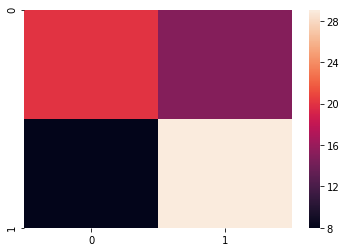

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy score (image labels only):', accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred));